In [1]:
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial, stats
import pickle
import statistics
from library import start

In [2]:
clean_filepath = start.clean_filepath
table_filepath = start.table_filepath

In [3]:
docs = pd.read_csv(clean_filepath + 'text_transcripts.csv')
docs = docs.set_index('doc')
docs.sample(5)

,text,year,semester,scenario
doc,,,,
121_c_Transcript.docx,"So, we’ll start first with, what you think w...",2017-18,fall,feedback
2019_98_5C_Transcript.docx,"So, now you’re gonna spend the next five mi...",2018-19,spring,behavior
2019_10_5C_Transcript.docx,"All right. So, um, how are you feeling abo...",2018-19,spring,behavior
44-2C.docx,"So how do you think that that went? Yeah, ...",2017-18,spring,behavior
01_1920_05_048_22c_Transcript.docx,"Yeah. Yeah, that's great. So, you'v...",2019-20,fall,behavior


In [4]:
matrix = pd.read_csv(clean_filepath + 'matrix_transcripts_lsa_wgt_stop.csv')
matrix

,doc,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,68_c_Transcript.docx,0.558787,0.321799,-0.161007,0.107477,-0.087776,-0.132437,-0.093025,0.185610,-0.126029,...,0.053461,-0.002239,0.088173,-0.020041,0.050418,0.005764,0.043186,-0.081071,0.018455,-0.006373
1,90_c_Transcript.docx,0.570273,0.273467,-0.166070,0.126194,-0.170981,-0.126794,0.012267,0.116092,0.130480,...,0.020456,-0.078680,-0.034072,-0.069255,0.014877,0.000960,0.043268,-0.028481,0.002415,0.046947
2,122_c_Transcript.docx,0.459220,0.303517,-0.178516,0.290378,-0.023689,-0.050590,-0.083519,0.189130,-0.142369,...,-0.017788,-0.052569,-0.052090,0.046110,0.055879,0.026578,-0.157871,-0.031125,-0.015786,-0.049763
3,12_c_Transcript.docx,0.450531,0.222128,-0.051120,0.132502,-0.092404,-0.023767,-0.030890,-0.017244,-0.082709,...,0.107270,0.084790,-0.038671,0.004460,0.169328,0.034926,-0.105542,0.011613,-0.031266,0.008969
4,113_c_Transcript.docx,0.439151,0.274813,-0.179806,0.113169,-0.023224,-0.205805,0.094378,0.118218,-0.085042,...,-0.009292,-0.054365,-0.051352,0.133392,-0.048240,-0.019551,0.011963,0.087301,0.059002,0.051539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,01_1920_05_005_22c_Transcript.docx,0.375745,-0.055653,-0.031534,0.005365,-0.208468,-0.023002,-0.115835,0.000533,0.039541,...,0.112069,-0.012670,0.081249,0.194741,0.024177,-0.051740,0.029532,0.011952,0.023772,0.127720
280,01_1920_05_052_22c_Transcript.docx,0.571856,-0.210406,-0.135833,-0.173694,-0.177015,0.097011,-0.007587,-0.071140,-0.004372,...,0.025160,-0.015914,0.068416,-0.038303,0.025065,-0.079330,-0.018526,-0.126027,0.019900,-0.075969
281,01_1920_05_051_22c_Transcript.docx,0.591433,-0.225962,-0.094971,-0.156883,-0.279893,0.069839,-0.102857,-0.067842,0.011429,...,0.041609,0.038765,0.083307,0.014219,0.011632,-0.027923,0.035866,0.044792,-0.011076,0.014592
282,01_1920_05_048_22c_Transcript.docx,0.473751,-0.111102,-0.091899,-0.105430,-0.217175,0.050001,-0.124939,-0.040363,-0.005286,...,-0.015050,0.032510,-0.021998,0.000090,0.043485,-0.033630,0.038202,-0.030192,-0.011951,-0.056398


In [5]:
results = pd.read_csv(clean_filepath + 'results_lsa_wgt_stop.csv')
results.sample(3)

,doc,text,year,semester,scenario,session_sim,study_sim_fall2017_18,study_sim_spring2017_18,study_sim_fall2018_19,study_sim_spring2018_19,study_sim_fall2019_20,script_sim
81,32-2C.docx,And how are you feeling about that? The firs...,2017-18,spring,behavior,0.359521,0.202258,0.359521,0.193206,0.255786,0.218338,0.303719
276,01_1920_05_012_22c_Transcript.docx,And this is Rosalie Chung’s coaching session...,2019-20,fall,behavior,0.331647,0.197070,0.260430,0.223215,0.313361,0.331647,0.308811
273,01_1920_05_008_22C_Transcript.docx,Okay. This is Rosalie Chung’s coaching ses...,2019-20,fall,behavior,0.434122,0.165157,0.265882,0.187903,0.364765,0.434122,0.327320


Goal: Create a distribution of similarities from one document to other documents _from its own study_.

In [6]:
(results['year'] + results['semester']).unique()

array(['2017-18fall', '2017-18spring', '2018-19fall', '2018-19spring',
       '2019-20fall'], dtype=object)

In [21]:
def add_study(df: pd.DataFrame) -> pd.DataFrame:
    """Add study column to an input DataFrame."""
    
    df_copy = df.copy()
    try:
        df_copy['study'] = df_copy['year'] + df_copy['semester']
    except KeyError:
        raise ValueError("DataFrame doesn't have the right columns.")
        
    return df_copy
        

In [22]:
def pairwise_distance(matrix_main: pd.DataFrame, matrix_comparison: pd.DataFrame):
    """Given two document-term matrices, each indexed by document name, compute cosine similarity of every
        row in matrix_main to every row in matrix_comparison, unless they have the same index."""
    ave_sims = []
    for maindoc in matrix_main.index:
        sims = []
        matrix_comp = matrix_comparison[~matrix_comparison.index.isin([maindoc])] # exclude self
        for compdoc in matrix_comp.index:
            sim = 1 - spatial.distance.cosine(matrix_main.loc[maindoc], matrix_comp.loc[compdoc])
            sims.append(sim)
        ave_sim = sum(sims)/len(sims)
        ave_sims.append(ave_sim)
    return ave_sims

In [23]:
df = add_study(results)

In [24]:
df['study'].value_counts()

2017-18fall      76
2017-18spring    68
2019-20fall      48
2018-19fall      47
2018-19spring    45
Name: study, dtype: int64

In [25]:
matrix.head()

,doc,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,68_c_Transcript.docx,0.558787,0.321799,-0.161007,0.107477,-0.087776,-0.132437,-0.093025,0.185610,-0.126029,...,0.053461,-0.002239,0.088173,-0.020041,0.050418,0.005764,0.043186,-0.081071,0.018455,-0.006373
1,90_c_Transcript.docx,0.570273,0.273467,-0.166070,0.126194,-0.170981,-0.126794,0.012267,0.116092,0.130480,...,0.020456,-0.078680,-0.034072,-0.069255,0.014877,0.000960,0.043268,-0.028481,0.002415,0.046947
2,122_c_Transcript.docx,0.459220,0.303517,-0.178516,0.290378,-0.023689,-0.050590,-0.083519,0.189130,-0.142369,...,-0.017788,-0.052569,-0.052090,0.046110,0.055879,0.026578,-0.157871,-0.031125,-0.015786,-0.049763
3,12_c_Transcript.docx,0.450531,0.222128,-0.051120,0.132502,-0.092404,-0.023767,-0.030890,-0.017244,-0.082709,...,0.107270,0.084790,-0.038671,0.004460,0.169328,0.034926,-0.105542,0.011613,-0.031266,0.008969
4,113_c_Transcript.docx,0.439151,0.274813,-0.179806,0.113169,-0.023224,-0.205805,0.094378,0.118218,-0.085042,...,-0.009292,-0.054365,-0.051352,0.133392,-0.048240,-0.019551,0.011963,0.087301,0.059002,0.051539


## Create distribution of within-study similarity

This function will give us one single bootstrap. Holdout `holdout` documents, then compute the similarity within the same study for the remaining. If we do this lots of times, we'll get a distribution.

In [26]:
def similarity_pass(df: pd.DataFrame, sim_matrix: pd.DataFrame, study_col: str = 'study',
                    study_val: str = '2017-18fall', holdout: float = 1/3, index_val: str = 'doc'):
    """Given a DataFrame and a value for column study, compute pairwise similarity metric 
        while holding out holdout proportion of values. This is a single pass."""
    
    df_copy = df.copy()
    sampled = df_copy[df_copy[study_col] == study_val].sample(frac=1 - holdout)
    indexed = sampled.set_index(index_val)
    
    matrix_copy = matrix.copy()
    matrix_indexed = matrix_copy.set_index(index_val)
    
    filtered_matrix = matrix_indexed[matrix_indexed.index.isin(indexed.index)]
    
    similarity = pairwise_distance(filtered_matrix, filtered_matrix)
    
    return np.mean(similarity)

Try running it a few times.

In [27]:
similarity_pass(df=df, sim_matrix=matrix, study_col='study', study_val='2017-18fall', holdout=0.4, index_val='doc')

0.36164674179362183

Now let's define a convenient lambda with our defaults.

In [28]:
sim_pass = lambda study_val: similarity_pass(
    df=df, sim_matrix=matrix, study_col='study', study_val=study_val, holdout=0.4, index_val='doc'
)

In [30]:
all_sims = []
for study_val in df['study'].unique():
    current_sims = [sim_pass(study_val) for _ in range(1000)]
    all_sims.append((study_val, current_sims))

You could potentially speed this up using joblib.

Save

In [45]:
sims_dict = {k: v for (k, v) in all_sims}

In [46]:
file = open(clean_filepath + 'within_sims_dict', 'wb')
pickle.dump(sims_dict, file)
file.close
file = open(clean_filepath + 'within_sims_dict', 'rb')
test = pickle.load(file)
file.close()

Explore

In [47]:
df['study'].unique()

array(['2017-18fall', '2017-18spring', '2018-19fall', '2018-19spring',
       '2019-20fall'], dtype=object)

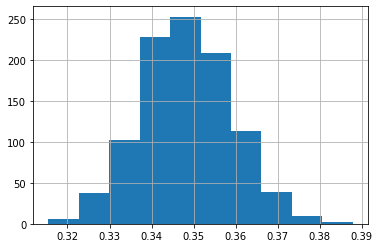

In [48]:
pd.Series(sims_dict['2017-18fall']).hist()

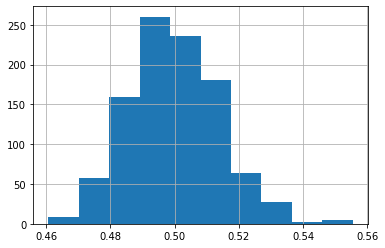

In [49]:
pd.Series(sims_dict['2018-19fall']).hist()

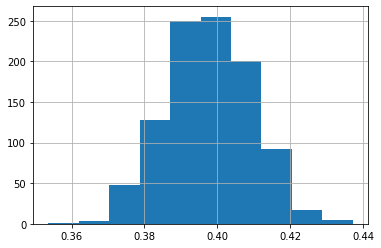

In [50]:
pd.Series(sims_dict['2017-18spring']).hist()

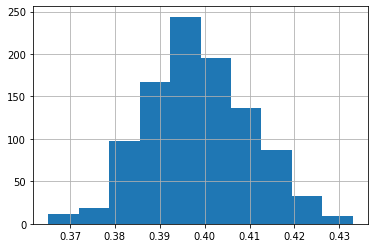

In [54]:
pd.Series(sims_dict['2018-19spring']).hist()

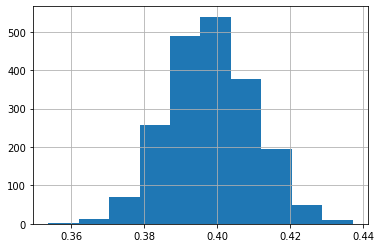

In [61]:
spring_sims_list = []
for i in sims_dict['2017-18spring']:
    spring_sims_list.append(i)
for i in sims_dict['2018-19spring']:
    spring_sims_list.append(i)
pd.Series(spring_sims_list).hist()

In [52]:
all_sims_list = []
for i in all_sims:
    all_sims_list.extend(i[1])

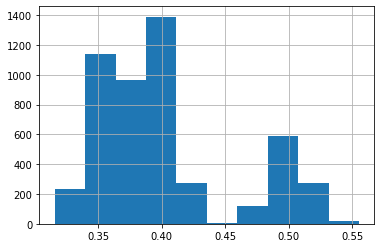

In [53]:
pd.Series(all_sims_list).hist()

# Across-study distribution

In [63]:
def across_similarity_pass(df: pd.DataFrame, sim_matrix: pd.DataFrame, study_col: str = 'study',
                    study_val1: str = '2017-18spring', study_val2: str = '2018-19spring', holdout: float = 1/3, index_val: str = 'doc'):
    """Given a DataFrame and a value for column study, compute pairwise similarity metric 
        while holding out holdout proportion of values. This is a single pass."""
    
    df_copy = df.copy()
    sampled1 = df_copy[df_copy[study_col] == study_val1].sample(frac=1 - holdout)
    sampled2 = df_copy[df_copy[study_col] == study_val2].sample(frac=1 - holdout)
    indexed1 = sampled1.set_index(index_val)
    indexed2 = sampled2.set_index(index_val)

    matrix_copy = matrix.copy()
    matrix_indexed = matrix_copy.set_index(index_val)
    
    filtered_matrix1 = matrix_indexed[matrix_indexed.index.isin(indexed1.index)]
    filtered_matrix2 = matrix_indexed[matrix_indexed.index.isin(indexed2.index)]
   
    similarity = pairwise_distance(filtered_matrix1, filtered_matrix2)
    
    return np.mean(similarity)

Try running it a few times

In [66]:
across_similarity_pass(df = df, sim_matrix = matrix, study_col = 'study',
                      study_val1 = '2017-18spring', study_val2 = '2018-19spring',
                      holdout = .4, index_val = 'doc')

0.3101969042315091

In [72]:
sim_pass = lambda study_val1, study_val2: across_similarity_pass(
    df=df, sim_matrix=matrix, study_col='study', 
    study_val1=study_val1, study_val2 = study_val2,
    holdout=0.4, index_val='doc'
)

In [73]:
across_spring_sims = [sim_pass('2017-18spring', '2018-19spring') for _ in range(1000)]

In [74]:
across_spring_sims

[0.3120186190998637,
 0.32315298457625324,
 0.3107101566823179,
 0.3196602082165646,
 0.31034897327441996,
 0.3095263731675854,
 0.3188124826873391,
 0.31668814219931274,
 0.31346737056527857,
 0.3027129632697059,
 0.3143316560764481,
 0.32345892321061454,
 0.32064668795209356,
 0.3179689051876825,
 0.32025177625603996,
 0.32058090814898604,
 0.3117141494273903,
 0.32106104406344377,
 0.3272679084221619,
 0.3172725179820419,
 0.30168418365060107,
 0.3053638033294541,
 0.30612738369083975,
 0.3079522899107012,
 0.3054653943815905,
 0.30480945225053585,
 0.3061960978409336,
 0.3077978307711194,
 0.3156590414177404,
 0.3138998118510095,
 0.3179798880596077,
 0.3112738552475529,
 0.3124842403179039,
 0.318721329305237,
 0.3203355116187577,
 0.3200067686184285,
 0.30707890285504963,
 0.3024759694908987,
 0.3189745643228642,
 0.312410377437332,
 0.3122498573403849,
 0.3148418351145612,
 0.3035293724988576,
 0.320007153058769,
 0.30021112651845144,
 0.318617054467346,
 0.30157627068516474,
 0

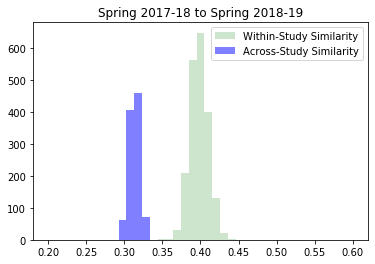

In [83]:
bins = np.linspace(.2, .6, num = 40)
plt.title("Spring 2017-18 to Spring 2018-19")

plt.hist(spring_sims_list, bins,color = "green", label = "Within-Study Similarity", alpha = .2 )
plt.hist(across_spring_sims, bins,color = "blue", label = "Across-Study Similarity", alpha = .5 )

plt.legend()
plt.show()

In [84]:
stats.ttest_ind(spring_sims_list, across_spring_sims)

Ttest_indResult(statistic=213.69250077299515, pvalue=0.0)

In [85]:
statistics.stdev(spring_sims_list)

0.011683064287797352

In [82]:
statistics.stdev(across_spring_sims)

0.006663252647563437

In [87]:
stats.kstest(spring_sims_list, 'norm')

KstestResult(statistic=0.6415192546013478, pvalue=0.0)

In [88]:
stats.kstest(across_spring_sims, 'norm')

KstestResult(statistic=0.6159740361320745, pvalue=0.0)

In [ ]:
# decrease holdout - what changes

In [ ]:
sim_pass = lambda study_val: similarity_pass(
    df=df, sim_matrix=matrix, study_col='study', study_val=study_val, holdout=0.1, index_val='doc'
)

all_sims = []
for study_val in ['2017-18spring', '2018-19spring']:
    current_sims = [sim_pass(study_val) for _ in range(1000)]
    all_sims.append((study_val, current_sims))